<a href="https://colab.research.google.com/github/S-p-bi/cse-edge/blob/main/Machine_learning_EDGE_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
   Atomic Radius (pm)  Electronegativity  Thermal Conductivity (W/mK)  \
0          106.181018           3.003934                    82.201842   
1          192.607146           2.469118                   221.341369   
2          159.799091           1.721441                   350.448876   
3          139.798773           3.385524                   295.567706   
4           73.402796           2.959613                   324.558848   

   Density (g/cm³)  Melting Point (°C)  
0        10.622095         1194.481598  
1         9.844047         1138.519436  
2         1.000020         3643.767406  
3         7.154333         1148.275559  
4         7.913815         1233.408959  
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 5862959.5000 - mae: 2157.5977 - val_loss: 5688955.5000 - val_mae: 2158.9414
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5325717.0000 - mae: 2032.6052 - val_loss: 5684176.0000 - val_mae: 2157.8403
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5295389.0000 - mae: 2017.4358 - val_loss: 5677100.0000 - val_mae: 2156.2097
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5413144.5000 - mae: 2070.7607 - val_loss: 5666485.0000 - val_mae: 2153.7612
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5325461.0000 - mae: 2046.4812 - val_loss: 5651487.0000 - val_mae: 2150.2900
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5607003.5000 - mae: 2096.3174 - val_loss: 5630356.5000 - val_mae: 2145.3892
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5286785.5000 - mae: 2007.8214 - val_loss: 5601713.0000 - val_mae: 2138.7234
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4772905.0000 -

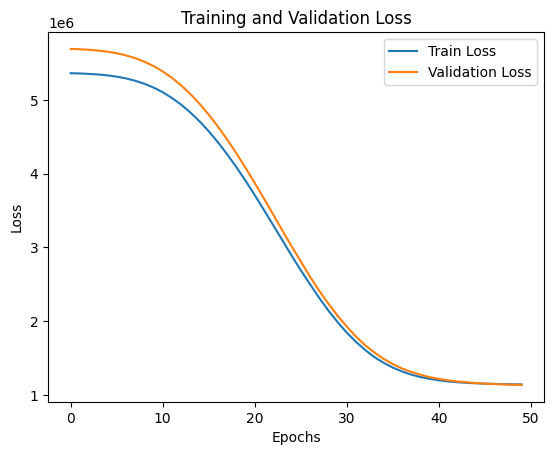

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Predicted Melting Points: [1553.7279 1861.7333 2325.9675 2318.2288 2395.4248]
True Melting Points: [1803.73018849 3535.75429698 2757.2731651  1111.52162847 3214.39313167]


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Step 1: Generate synthetic dataset and save as CSV
np.random.seed(42)
num_samples = 500

data_dict = {
    'Atomic Radius (pm)': np.random.uniform(50, 200, num_samples),
    'Electronegativity': np.random.uniform(0.7, 4.0, num_samples),
    'Thermal Conductivity (W/mK)': np.random.uniform(10, 400, num_samples),
    'Density (g/cm³)': np.random.uniform(0.5, 20, num_samples),
    'Melting Point (°C)': np.random.uniform(200, 4000, num_samples)  # target
}

df = pd.DataFrame(data_dict)
df.to_csv('melting_point_data.csv', index=False)

# Step 2: Load dataset
data = pd.read_csv('melting_point_data.csv')
print("Dataset Head:")
print(data.head())

# Step 3: Split into features and target
X = data[['Atomic Radius (pm)', 'Electronegativity', 'Thermal Conductivity (W/mK)', 'Density (g/cm³)']].values
y = data['Melting Point (°C)'].values

# Step 4: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Build neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Step 8: Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.2f}, Test MAE: {mae:.2f}")

# Step 9: Plot training performance
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Step 10: Make predictions
predictions = model.predict(X_test)
print(f"\nPredicted Melting Points: {predictions[:5].flatten()}")
print(f"True Melting Points: {y_test[:5]}")
